# Tracer une pyramide bigarrée

Ce notebook est la réponse à l'exercice proposé lors de l'article de blog qui consiste à afficher des boules de trois couleurs différentes de sorte qu'aucune boule n'est de voisine de la même couleur : [tracer une pyramide bigarrée](http://www.xavierdupre.fr/app/actuariat_python/helpsphinx/blog/2017/2017-04-18-seance4.html).

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [2]:
%matplotlib inline

## Problème

Il s'agit de dessiner la pyramide suivante à l'aide de [matplotlib](https://matplotlib.org/).

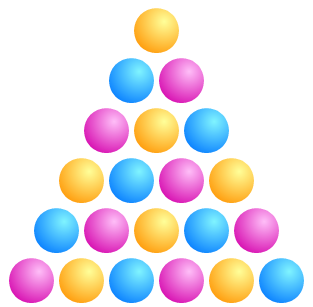

In [3]:
from IPython.display import Image
Image("http://lesenfantscodaient.fr/_images/biodiversite_tri2.png")

## Idée de la solution

On sépare le problème en deux plus petits : 

* Trouver la position des boules dans un repère cartésien.
* Choisir la bonne couleur.

Le repère est hexagonal. L'image suivante est tirée de la page wikipédia [empilement compact](https://fr.wikipedia.org/wiki/Empilement_compact).

c:\Python363_x64\lib\site-packages\sphinx\util\compat.py:40: RemovedInSphinx17Warning: sphinx.util.compat.Directive is deprecated and will be removed in Sphinx 1.7, please use docutils' instead.
  RemovedInSphinx17Warning)


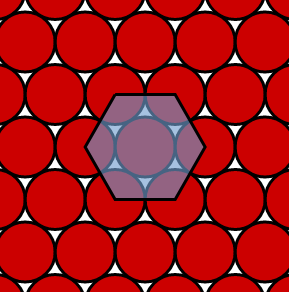

In [4]:
from pyquickhelper.helpgen import NbImage
NbImage("data/hexa.png")

Mais dans un premier temps, il faut un moyen de repérer chaque boule. On les numérote avec deux indices.

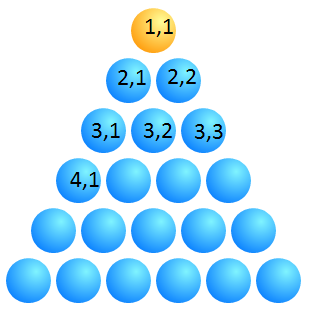

In [5]:
Image("http://lesenfantscodaient.fr/_images/pyramide_num2.png")

## Les coordonnées

On prend comme exemple [scatter_demo.py](https://matplotlib.org/examples/shapes_and_collections/scatter_demo.html) sur le site de matplotlib.

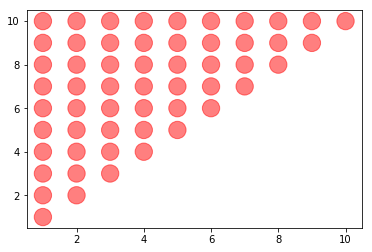

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1)
n = 10
x = []
y = []
for i in range(1,n+1):
    for j in range(i, n+1):
        x.append(i)
        y.append(j)
size = [300 for c in x]
colors = ["r" for c in x]
ax.scatter(x, y, s=size, c=colors, alpha=0.5)

On inverse.

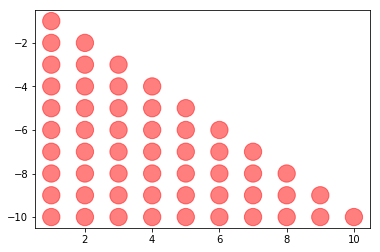

In [7]:
fig, ax = plt.subplots(1,1)
n = 10
x = []
y = []
for i in range(1,n+1):
    for j in range(i, n+1):
        x.append(i)
        y.append(-j)
size = [300 for c in x]
colors = ["r" for c in x]
ax.scatter(x, y, s=size, c=colors, alpha=0.5)

On décale.

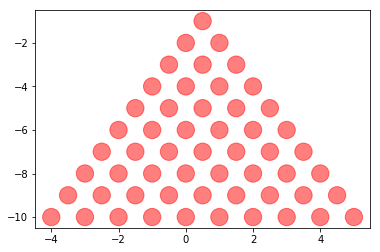

In [8]:
fig, ax = plt.subplots(1,1)
n = 10
x = []
y = []
for i in range(1,n+1):
    for j in range(i, n+1):
        x.append(i - j*0.5)
        y.append(-j)
size = [300 for c in x]
colors = ["r" for c in x]
ax.scatter(x, y, s=size, c=colors, alpha=0.5)

Cela ressemble à de l'hexagonal mais ce n'est pas encore tout à fait cela. La hauteur d'un triangle équilatéral de côté un est $\frac{\sqrt{3}}{2}$. Ca tombe bien car dans l'exemple précédente, le côté de chaque triangle est 1. Et on change la dimension du graphe tracé avec *matplotlib* pour éviter de réduire nos effort à néant.

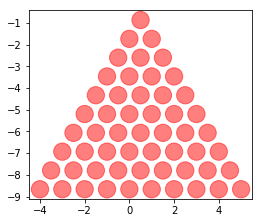

In [9]:
fig, ax = plt.subplots(1,1, figsize=(4, 4*(3**0.5)/2))
n = 10
x = []
y = []
for i in range(1,n+1):
    for j in range(i, n+1):
        x.append(i - j*0.5)
        y.append(-j*(3**0.5)/2)
size = [300 for c in x]
colors = ["r" for c in x]
ax.scatter(x, y, s=size, c=colors, alpha=0.5)

## La couleur

Je vous laisse retourner sur les deux premières images et observer la couleur de toutes les boules qui vérifient ``(i+j)%3 == 1``.

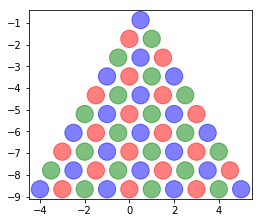

In [10]:
fig, ax = plt.subplots(1,1, figsize=(4, 4*(3**0.5)/2))
n = 10
x = []
y = []
colors = []
trois = "rgb"
for i in range(1,n+1):
    for j in range(i, n+1):
        x.append(i - j*0.5)
        y.append(-j*(3**0.5)/2)
        colors.append(trois[(i+j) % 3])
size = [300 for c in x]
ax.scatter(x, y, s=size, c=colors, alpha=0.5)